In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
first_df = pd.read_csv('Data/RFP/2025_04_24.csv')[['EC#', 'Strain', 'Avg_OD600', 'Avg_GFP', 'Avg_RFP', 'Rel_RFP']]
second_df = pd.read_csv('Data/RFP/2025_04_24_secondmeasurement.csv')[['EC#', 'Strain', 'Avg_OD600', 'Avg_GFP', 'Avg_RFP', 'Rel_RFP']]
third_df = pd.read_csv('Data/RFP/2025_04_24_thirdmeasurement.csv')[['EC#', 'Strain', 'Avg_OD600', 'Avg_GFP', 'Avg_RFP', 'Rel_RFP']]

first_df = first_df[first_df['EC#'].isin([63, 103, 108, 109])]
second_df = second_df[second_df['EC#'].isin([63, 103, 108, 109])]
third_df = third_df[third_df['EC#'].isin([63, 103, 108, 109])]

dfs = [first_df, second_df, third_df]

In [3]:
first_df.head()

,EC#,Strain,Avg_OD600,Avg_GFP,Avg_RFP,Rel_RFP
20,108,p800,0.030802,156430,427826.167,13889610
21,103,p1000 (del_23T),0.121008,150076,2120074.170,17520132
22,63,low_dG (high_expr),0.019488,111857,392815.167,20156627
23,109,p1000 (del_22A),0.022495,125255,660723.167,29371420


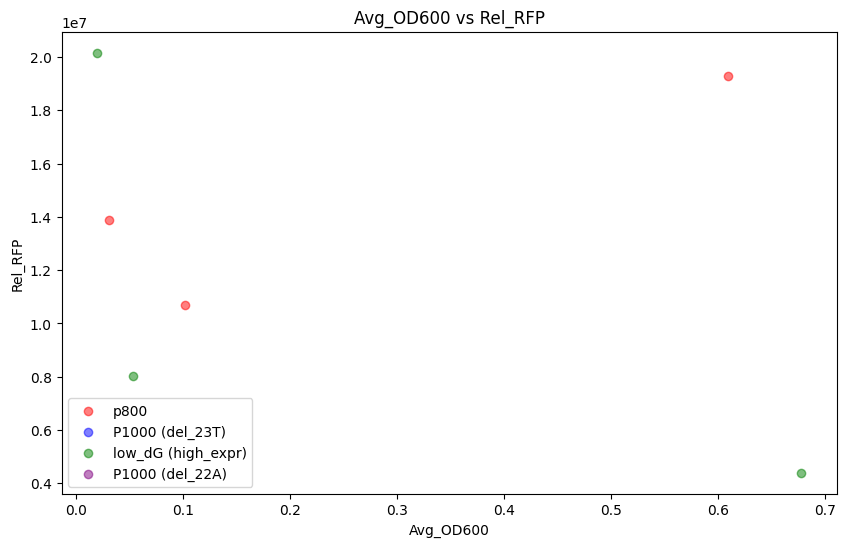

In [4]:
# make a scatter plot of Avg_OD600 vs Rel_RFP, seperating the points by Strain

strains = ['p800', 'P1000 (del_23T)', 'low_dG (high_expr)', 'P1000 (del_22A)']
strain_colors = {'p800': 'red', 'P1000 (del_23T)': 'blue', 'low_dG (high_expr)': 'green', 'P1000 (del_22A)': 'purple'}

legend_set = set()

plt.figure(figsize=(10, 6))

for df in dfs:
    for strain in strains:
        strain_df = df[df['Strain'] == strain]
        plt.scatter(
            strain_df['Avg_OD600'],
            strain_df['Rel_RFP'],
            color=strain_colors[strain],
            label=strain if strain not in legend_set else "",
            alpha=0.5,
        )
        legend_set.add(strain)

plt.legend()

plt.xlabel('Avg_OD600')
plt.ylabel('Rel_RFP')
plt.title('Avg_OD600 vs Rel_RFP')
plt.show()